In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import re
from datetime import datetime
import numpy as np
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла.

In [ ]:
#ваш код здесь
url = r'/content/dst-3.0_16_1_hh_database.csv'
df = pd.read_csv(url, sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [ ]:
#ваш код здесь
df.head(1)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [ ]:
#ваш код здесь
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [ ]:
#ваш код здесь
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


In [ ]:
len(df['Опыт работы'].unique())

44414

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [ ]:
def get_education(value_):
    if 'Высшее образование' in value_:
        return 'Высшее образование'
    elif 'Среднее специальное образование' in value_:
        return 'Среднее специальное образование'
    elif 'Неоконченное высшее образование' in value_:
        return 'Неоконченное высшее образование'
    elif 'Среднее образование' in value_:
        return 'Среднее образование'

df['Образование'] = df['Образование и ВУЗ'].apply(get_education)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина.
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '.
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [ ]:
#ваш код здесь
def sex(value_):
    sex = value_.split(' , ')[0][0]
    return sex

def age(value_):
    age = value_.split(' , ')[1]
    age = age.split()[0]
    return age

df['Пол'] = df['Пол, возраст'].apply(sex)
df['Возраст'] = df['Пол, возраст'].apply(age)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [ ]:
df[df['Опыт работы'].isna()].head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,Образование,Пол,Возраст
64,"Мужчина , 33 года , родился 18 октября 1985",10000 руб.,Системный администратор,"Санкт-Петербург , не готов к переезду , не гот...",полная занятость,"гибкий график, удаленная работа",NaN,Санкт-Петербургский государственный университе...,Санкт-Петербургский колледж телекоммуникаций,Высшее образование 2009 Санкт-Петербургский г...,14.04.2019 00:04,Не указано,Высшее образование,М,33
118,"Женщина , 40 лет , родилась 24 июля 1978",30000 руб.,Специалист в службу поддержки Медиасервисов Ян...,"Красноярск , не готова к переезду , не готова ...",полная занятость,полный день,NaN,ЧЛК,Забайкальский государственный гуманитарно-педа...,Высшее образование 2007 ЧЛК Экономика и бухгал...,17.04.2019 07:28,Не указано,Высшее образование,Ж,40
330,"Мужчина , 21 год , родился 11 сентября 1997",50000 руб.,Мастер по ремонту компьютеров,"Новокузнецк , не готов к переезду , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график",NaN,Томский государственный университет систем упр...,Не указано,Неоконченное высшее образование 2021 Томский ...,16.04.2019 09:08,Имеется собственный автомобиль,Неоконченное высшее образование,М,21
413,"Мужчина , 25 лет , родился 28 апреля 1994",25000 руб.,SMM-менеджер,"Саранск , не готов к переезду , готов к команд...","проектная работа, частичная занятость, полная ...","гибкий график, полный день, сменный график",NaN,ФГБОУ ВПО МГУ им. Н.П. Огарева,Не указано,Высшее образование (Магистр) 2018 ФГБОУ ВПО МГ...,21.04.2019 15:48,Не указано,Высшее образование,М,25
1170,"Мужчина , 22 года , родился 31 марта 1997",40000 руб.,Мастер по ремонту компьютеров,"Раменское , не готов к переезду , не готов к к...",полная занятость,полный день,NaN,ФЖАТ,Не указано,Среднее специальное образование 2017 ФЖАТ Прог...,15.04.2019 11:53,Не указано,Среднее специальное образование,М,22


In [ ]:
def get_experience(value_):
    # Регулярное выражение, которое соответствует началу строки
    pattern_month = r'^Опыт работы \d{1,2} месяц[аев]*\b'
    pattern_year_month = r'Опыт работы \d{1,2} (год|года|лет) \d{1,2} месяц[аев]*'
    pattern_year = r'Опыт работы \d{1,2} (год|года|лет)*'

    # Проверяем, соответствует ли начало строки нашему шаблону
    if value_ is np.nan:
        delta = np.nan
    elif re.match(pattern_month, value_):
        split_ = value_.split()
        delta = split_[2:3]
    elif re.match(pattern_year_month, value_):
        split_ = value_.split()
        years = int(split_[2])
        months = int(split_[4])
        delta = years*12 + months
    elif re.match(pattern_year, value_):
        split_ = value_.split()
        years = int(split_[2])
        delta = years*12
    else:
        delta = np.nan

    return delta

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(get_experience)

In [ ]:
df[['Опыт работы (месяц)', 'Опыт работы']].head()

,Опыт работы (месяц),Опыт работы
0,202,Опыт работы 16 лет 10 месяцев Август 2010 — п...
1,233,Опыт работы 19 лет 5 месяцев Январь 2000 — по...
2,123,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...
3,225,Опыт работы 18 лет 9 месяцев Август 2017 — Ап...
4,67,Опыт работы 5 лет 7 месяцев Региональный мене...


In [ ]:
df = df.drop(columns='Опыт работы')

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , …
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [ ]:
#ваш код здесь
def get_city(value_):
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    city = value_.split(' , ')[0]
    if city in million_cities:
        result = 'город-миллионник'
    elif city != 'Москва' and city != 'Санкт-Петербург':
        result = 'другие'
    else:
        result = city

    return result

def get_removal(value_):
    pattern_no = r'не готов[а]? к переезду'
    pattern_yes = r'(готов[а]? к переезду|хочу переехать)'

    if re.search(pattern_no, value_):
        result = False
    elif re.search(pattern_yes, value_):
        result = True
    else:
        result = 'Не известно'

    return result

def get_trip(value_):
    pattern_no = r'не готов[а]? к командировкам'
    pattern_yes = r'готов[а]? к (редким )?командировкам'

    if re.search(pattern_no, value_):
        result = False
    elif re.search(pattern_yes, value_):
        result = True
    else:
        result = False

    return result

df['Город'] = df['Город, переезд, командировки'].apply(get_city)
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(get_removal)
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(get_trip)

In [ ]:
df[['Город', 'Город, переезд, командировки', 'Готовность к переезду', 'Готовность к командировкам', 'Город, переезд, командировки']].head()

,Город,"Город, переезд, командировки",Готовность к переезду,Готовность к командировкам,"Город, переезд, командировки"
0,другие,"Советск (Калининградская область) , не готов к...",False,False,"Советск (Калининградская область) , не готов к..."
1,другие,"Королев , не готов к переезду , готов к редким...",False,True,"Королев , не готов к переезду , готов к редким..."
2,другие,"Тверь , не готова к переезду , не готова к ком...",False,False,"Тверь , не готова к переезду , не готова к ком..."
3,другие,"Саратов , не готов к переезду , готов к редким...",False,True,"Саратов , не готов к переезду , готов к редким..."
4,Москва,"Москва , не готова к переезду , готова к коман...",False,True,"Москва , не готова к переезду , готова к коман..."


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [ ]:
#ваш код здесь
for i in range(len(df)):
    value_ = df.loc[i, 'Занятость']
    if 'стажировка' in value_.lower():
        df.loc[i, 'стажировка'] = True
    if 'волонтерство' in value_.lower():
        df.loc[i, 'волонтерство'] = True
    if 'частичная занятость' in value_.lower():
        df.loc[i, 'частичная занятость'] = True
    if 'проектная работа' in value_.lower():
        df.loc[i, 'проектная работа'] = True
    if 'полная занятость' in value_.lower():
        df.loc[i, 'полная занятость'] = True

df[['стажировка', 'волонтерство', 'частичная занятость', 'проектная работа', 'полная занятость']] = df[['стажировка', 'волонтерство', 'частичная занятость', 'проектная работа', 'полная занятость']].fillna(False)

In [ ]:
for i in range(len(df)):
    value_ = df.loc[i, 'График']
    if 'вахтовый метод' in value_.lower():
        df.loc[i, 'вахтовый метод'] = True
    if 'удаленная работа' in value_.lower():
        df.loc[i, 'удаленная работа'] = True
    if 'гибкий график' in value_.lower():
        df.loc[i, 'гибкий график'] = True
    if 'полный день' in value_.lower():
        df.loc[i, 'полный день'] = True
    if 'сменный график' in value_.lower():
        df.loc[i, 'сменный график'] = True

df[['вахтовый метод', 'удаленная работа', 'гибкий график', 'полный день', 'сменный график']] = df[['вахтовый метод', 'удаленная работа', 'гибкий график', 'полный день', 'сменный график']].fillna(False)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**.
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата,
* "proportion" - пропорция,
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования:
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [ ]:
df_currency = pd.read_csv("ExchangeRates.csv")[["currency", "date", "proportion", "close"]]
df_currency["true_cur"] = df_currency.close / df_currency.proportion
df_currency = df_currency.set_index(["currency", "date"])


def get_payment_in_rubles(row):
    num, currency = row["ЗП"].split()
    num = float(num)

    if currency == "руб.":
        return num

    dct_transform_cur_name = {"бел.руб.":"BYN", "сум":"UZS", "грн.": "UAH"}
    if currency in dct_transform_cur_name.keys():
        currency = dct_transform_cur_name[currency]

    date = datetime.strptime(row["Обновление резюме"], "%d.%m.%Y %H:%M").strftime("%d/%m/%y")
    return df_currency.loc[currency, date].true_cur * num

df["ЗП (руб)"] = df.apply(get_payment_in_rubles, axis=1)
df.drop("ЗП", axis=1, inplace=True)

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

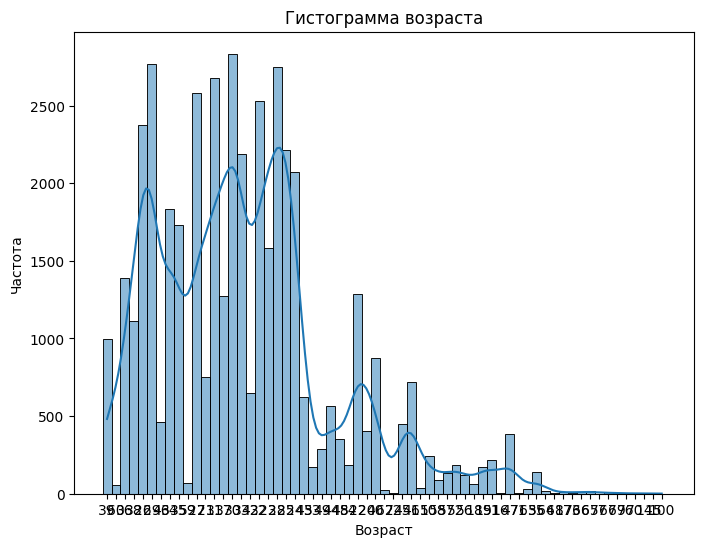

In [ ]:
# Построение гистограммы
plt.figure(figsize=(8, 6))
sns.histplot(df['Возраст'], bins=10, kde=True)
plt.title('Гистограмма возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

In [ ]:
df['Возраст'] = df['Возраст'].astype('int')

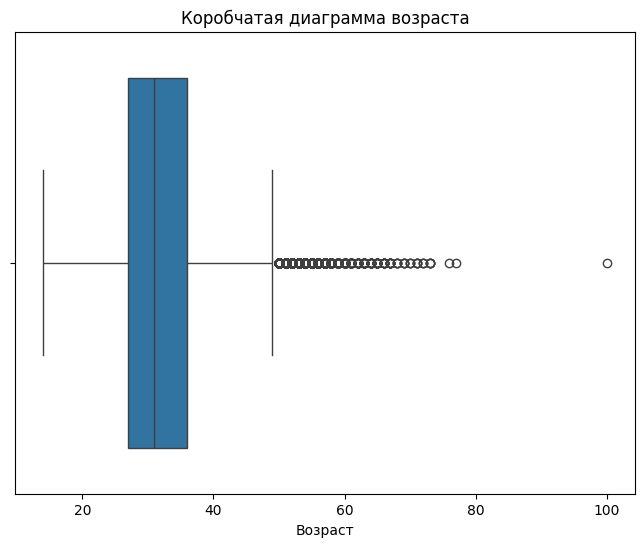

In [ ]:
# Построение коробчатой диаграммы
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Возраст'])
plt.title('Коробчатая диаграмма возраста')
plt.xlabel('Возраст')
plt.show()

ваши выводы по графику здесь


Возрастное распределение имеет асимметричную форму с длинным правым "хвостом". Основные характеристики этого распределения таковы:

Мода, то есть наиболее часто встречающийся возраст, находится в районе 30 лет и определяется по наивысшей точке на гистограмме.
Возрастные границы распределения варьируются от приблизительно 14 до 100 лет. Однако, если рассматривать данные за пределами максимума на коробчатой диаграмме как выбросы, то верхняя граница сокращается до 55 лет.
Большинство возрастов соискателей находится в интерквартильном размахе от 20 до 40 лет, что отображено в "коробке" на коробчатой диаграмме.
Значения старше 50 лет можно считать аномальными согласно коробчатой диаграмме, но для улучшения обобщающей способности модели рекомендуется учитывать все значения до 80 лет и считать аномальными только те, что превышают этот возраст.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [ ]:
# Построение гистограммы и коробчатой диаграммы рядом
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма опыта работы
sns.histplot(df['Опыт работы (месяц)'], kde=False, ax=axs[0])
axs[0].set_title('Гистограмма опыта работы (месяц)')
axs[0].set_xlabel('Опыт работы (месяц)')
axs[0].set_ylabel('Частота')

# Коробчатая диаграмма опыта работы
sns.boxplot(x=df['Опыт работы (месяц)'], ax=axs[1])
axs[1].set_title('Коробчатая диаграмма опыта работы')
axs[1].set_xlabel('Опыт работы (месяц)')

plt.tight_layout()
plt.show()

ваши выводы здесь

Наиболее часто встречаемое значение (мода) в распределении — это 96 месяцев опыта работы.
Коробчатая диаграмма показывает, что основная часть данных лежит в интервале от 0 до 250 месяцев. Однако есть отдельные значения (аномалии или выбросы), которые значительно превышают 250 месяцев. Исключая неадекватные данные, такие как 100 лет опыта, весь диапазон данных ограничивается 700 месяцами.
Интервал от 50 до 150 месяцев опыта работы выделен на коробчатой диаграмме.
Значения, превышающие 300 месяцев, можно считать аномальными. Особенно выделяются те, которые достигают 1000 месяцев и более. Такие экстремальные данные, вероятно, представляют собой ошибки ввода.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


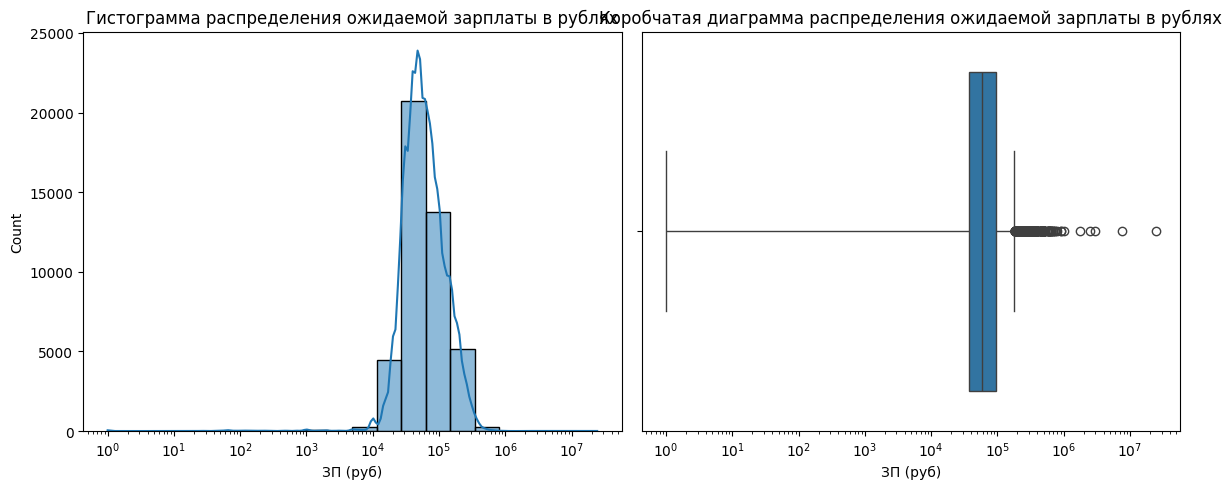

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))


# Гистограмма
sns.histplot(df['ЗП (руб)'], bins=20, kde=True, ax=ax[0], log_scale=True)
ax[0].set_title('Гистограмма распределения ожидаемой зарплаты в рублях')

# Коробчатая диаграмма (Boxplot)
sns.boxplot(x=df['ЗП (руб)'], ax=ax[1])
ax[1].set_title('Коробчатая диаграмма распределения ожидаемой зарплаты в рублях')
ax[1].set_xscale("log")

plt.tight_layout()
plt.show()

ваши выводы здесь

Пределы нормального распределения признака, исключая аномалии, составляют от 1 до 24 миллионов рублей.
Основная масса значений находится в диапазоне от 40,000 до 100,000 рублей.
В данных присутствует значительное количество аномально высоких значений: суммы свыше 250,000 рублей считаются аномалиями для данного анализа.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [ ]:
# ваш код здесь
df_filtered = df[df['ЗП (руб)'] < 1e6]

# Группируем по образованию и вычисляем медиану
median_salary = df_filtered.groupby('Образование')['ЗП (руб)'].median().reset_index()

# Строим диаграмму
plt.figure(figsize=(10, 6))
sns.barplot(x='Образование', y='ЗП (руб)', data=median_salary, order=['среднее', 'среднее специальное', 'неоконченное высшее', 'высшее'])
plt.xticks(rotation=45)
plt.title('Зависимость медианной желаемой ЗП от уровня образования')
plt.ylabel('Медианная ЗП (руб)')
plt.xlabel('Уровень образования')
plt.show()

ваши выводы здесь

- наибольший уровень желаемой зп наблюдается для людей с высшим образованием
- наименьший уровень ожидаемой зп наблюдается для людей с средним и средним специальным образованием

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

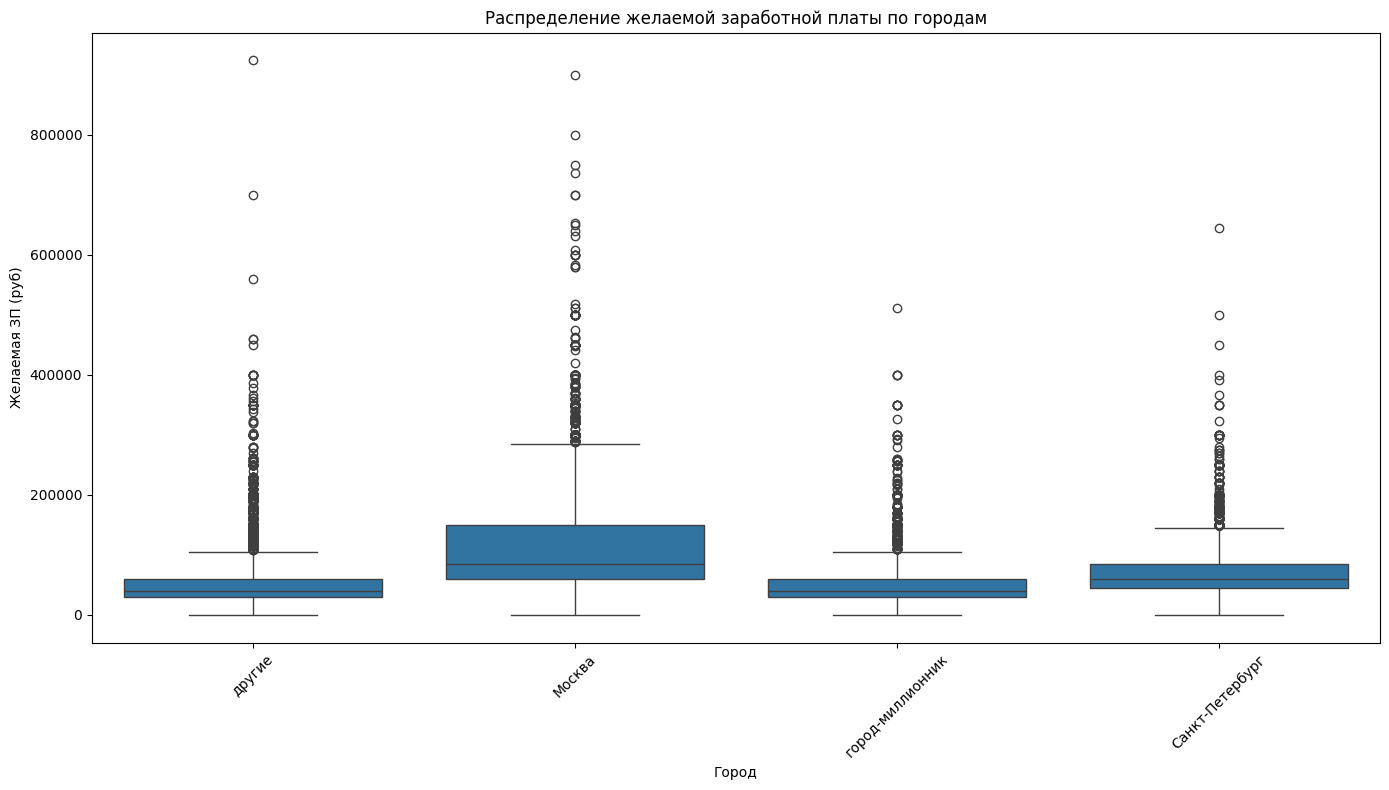

In [ ]:
# ваш код здесь
df['ЗП (руб)'] = df['ЗП (руб)'].replace(r'\s+', '', regex=True).astype(float)
df_filtered = df[df['ЗП (руб)'] < 1e6]

# Строим коробчатую диаграмму
plt.figure(figsize=(14, 8))
sns.boxplot(x='Город', y='ЗП (руб)', data=df_filtered)
plt.xticks(rotation=45)
plt.title('Распределение желаемой заработной платы по городам')
plt.ylabel('Желаемая ЗП (руб)')
plt.xlabel('Город')
plt.tight_layout()  # Автоматически подгоняет размер подписей, чтобы они не обрезались
plt.show()

ваши выводы здесь


Медианные значения заработной платы упорядочены по убыванию: Москва имеет самый высокий уровень, за ней следует Санкт-Петербург, а города-миллионники и другие города находятся приблизительно на одном уровне.
Признак города играет ключевую роль в прогнозировании уровня заработной платы, поскольку разброс и средние значения заработной платы в некоторых категориях (например, в Москве) значительно отличаются от общей совокупности.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

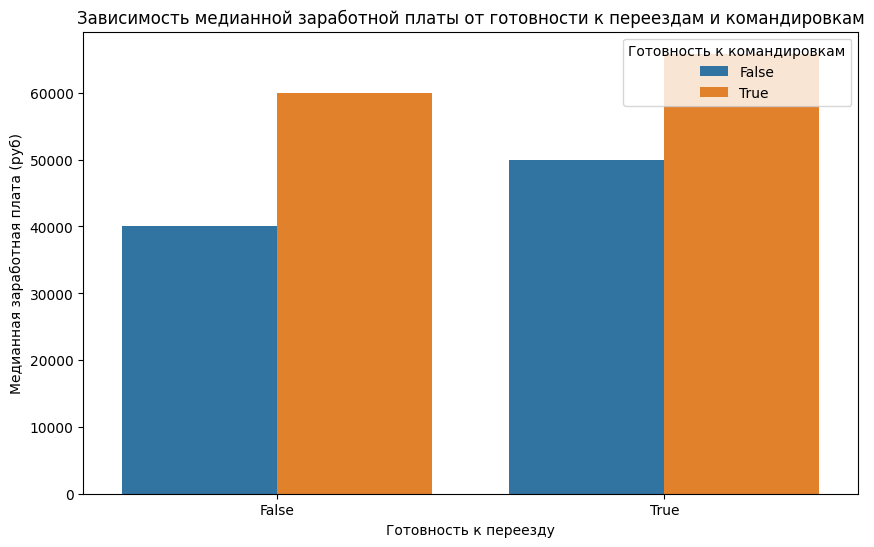

In [ ]:
# ваш код здесь
median_salary = df.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index()

# Теперь строим многоуровневую столбчатую диаграмму
plt.figure(figsize=(10, 6))
sns.barplot(x='Готовность к переезду', y='ЗП (руб)', hue='Готовность к командировкам', data=median_salary)
plt.title('Зависимость медианной заработной платы от готовности к переездам и командировкам')
plt.xlabel('Готовность к переезду')
plt.ylabel('Медианная заработная плата (руб)')
plt.show()

In [ ]:
ваши выводы здесь

Уровни ЗП в зависимости от готовности к командировкам и переезду в порядке убывания
- готов и к тому и к том
- не готов к переезду, но готов к командировками
- готов к переезду, не готов к командировкам
- не готов ни к чему

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

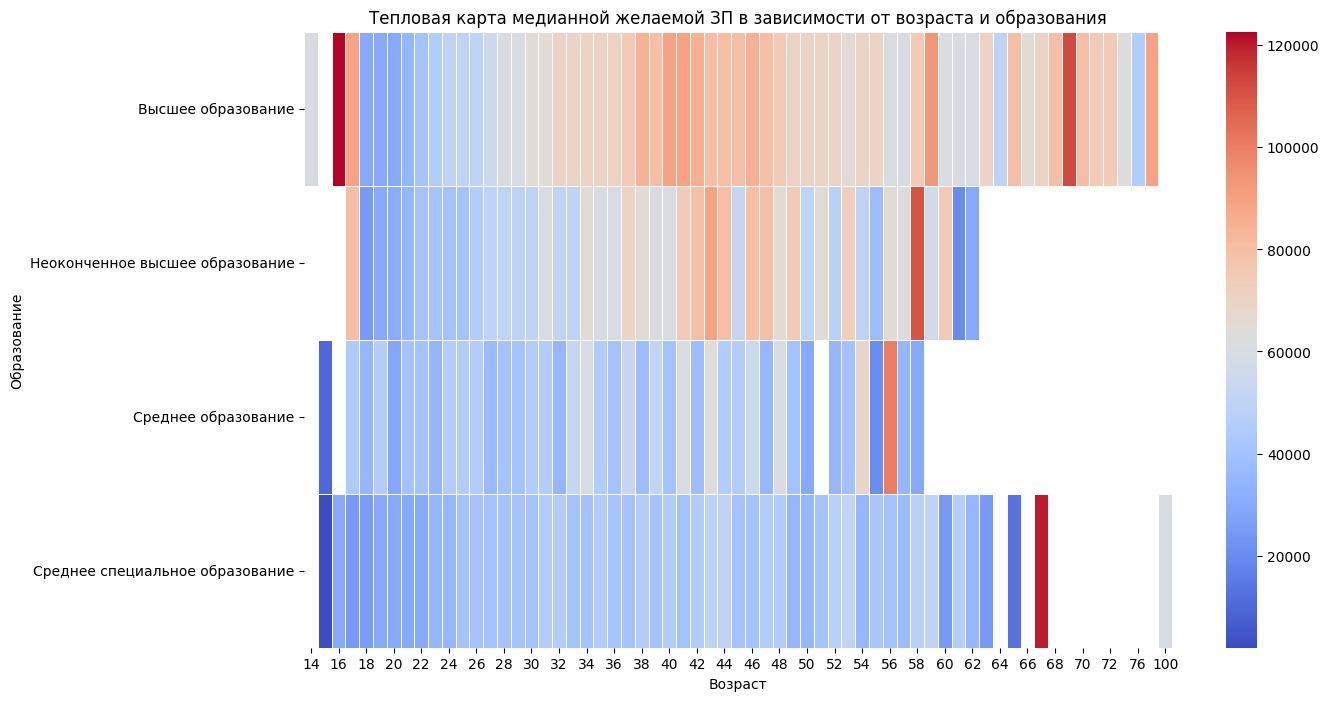

In [ ]:
# ваш код здесь
pivot_table = df.pivot_table(values='ЗП (руб)', index='Образование', columns='Возраст', aggfunc='median')

# Тепловая карта на основе сводной таблицы
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=False, fmt=".0f", linewidths=.5, cmap='coolwarm')
plt.title('Тепловая карта медианной желаемой ЗП в зависимости от возраста и образования')
plt.xlabel('Возраст')
plt.ylabel('Образование')
plt.show()

ваши выводы здесь

По графику видно что в первую очередь уровень зарплаты растет по уровню образования, но с возрастом тоже есть определенная зависимость: значительно большое хотят получать молодые специалисты с высшим образованием и люди старшего возраста
Медиана зп у молодых специалистов с высшим образованием - 122к рублей
У специалистов среднего и пожилого возрастов медианная зп тоже подходит к этому значению с возрастом

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

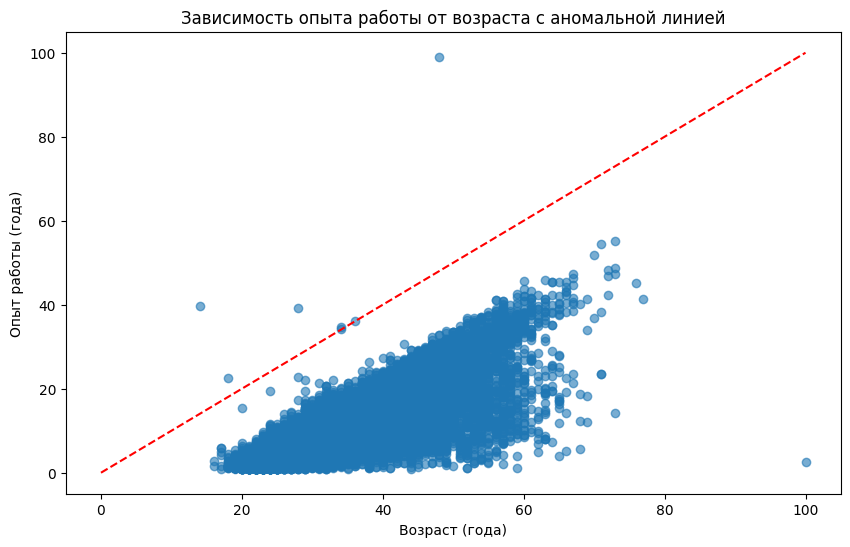

In [ ]:
# ваш код здесь
# Убедитесь, что данные в df['Опыт работы (месяц)'] находятся в подходящем формате
df['Опыт работы (месяц)'] = pd.to_numeric(df['Опыт работы (месяц)'], errors='coerce')  # преобразует в числа, не числа в NaN

# Теперь вы можете безопасно выполнить деление, т.к. операция поддерживается в pandas
df['Опыт работы (года)'] = df['Опыт работы (месяц)'] / 12


plt.figure(figsize=(10, 6))
plt.scatter(df['Возраст'], df['Опыт работы (года)'], alpha=0.6)


# Построение прямой, проходящей через точки (0, 0) и (100, 100)
max_value = 100  # Задаем максимальное значение для прямой
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

# Добавляем подписи и заголовок
plt.title('Зависимость опыта работы от возраста с аномальной линией')
plt.xlabel('Возраст (года)')
plt.ylabel('Опыт работы (года)')

# Отображение графика
plt.show()

ваши выводы здесь

В общем большинство точек лежат ниже самой прямой. Максимальные не аномальные точки отстают от прямой примерно на одинаковое значение - средний возраст когда люди начинают работать.
Также на графики можно наблюдать точки-аномалии.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


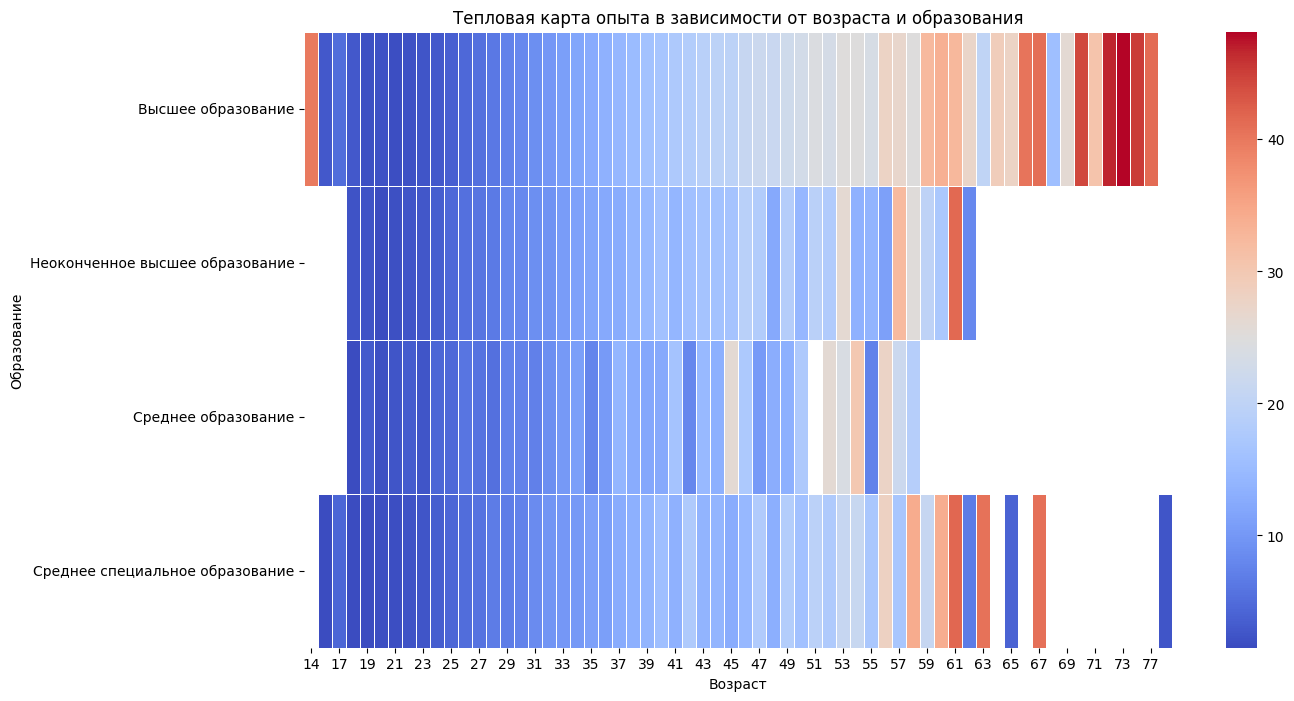

In [ ]:
# ваш код здесь
pivot_table = df.pivot_table(values='Опыт работы (года)', index='Образование', columns='Возраст', aggfunc='median')

# Тепловая карта на основе сводной таблицы
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=False, fmt=".0f", linewidths=.5, cmap='coolwarm')
plt.title('Тепловая карта опыта в зависимости от возраста и образования')
plt.xlabel('Возраст')
plt.ylabel('Образование')
plt.show()

ваши выводы здесь

По тепловой карте видно что опыт сильнее всего по выборке увеличивается после 56 лет. В группе с высшим образованием начинает увеличиваться в среднем раньше и делает это более плавно, что, возможно, свидетельствует о более стабильной работе

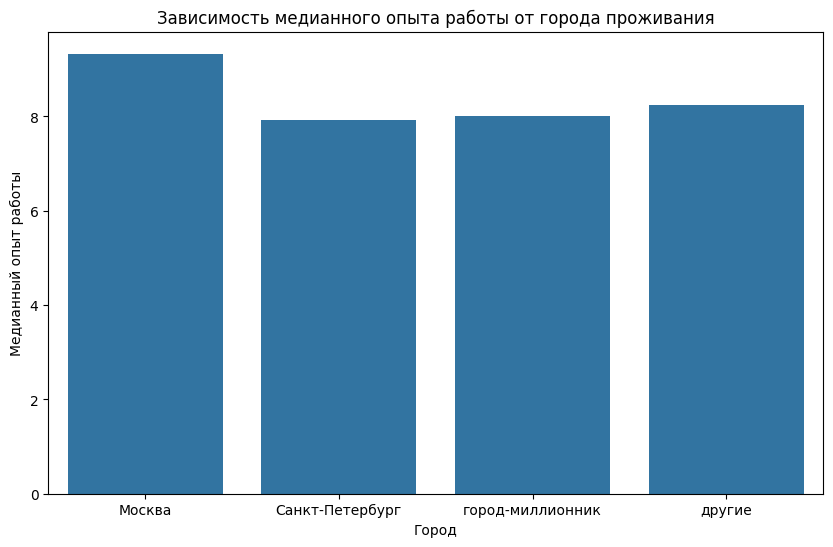

In [ ]:
median_salary = df.groupby(['Город'])['Опыт работы (года)'].median().reset_index()

# Теперь строим многоуровневую столбчатую диаграмму
plt.figure(figsize=(10, 6))
sns.barplot(x='Город', y='Опыт работы (года)', data=median_salary)
plt.title('Зависимость медианного опыта работы от города проживания')
plt.xlabel('Город')
plt.ylabel('Медианный опыт работы')
plt.show()

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их.

In [ ]:
# ваш код здесь

df.drop("Опыт работы (года)", axis=1, inplace=True)

print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(44744, 28)
(44588, 28)


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах.

In [ ]:
# ваш код здесь
df_correct = (44586 - df.count())
df_correct

Пол, возраст                         -2
Ищет работу на должность:            -2
Город, переезд, командировки         -2
Занятость                            -2
График                               -2
Последнее/нынешнее место работы      -1
Последняя/нынешняя должность          0
Образование и ВУЗ                    -2
Обновление резюме                    -2
Авто                                 -2
Образование                          -2
Пол                                  -2
Возраст                              -2
Опыт работы (месяц)                1644
Город                                -2
Готовность к переезду                -2
Готовность к командировкам           -2
частичная занятость                  -2
проектная работа                     -2
полная занятость                     -2
стажировка                           -2
волонтерство                         -2
вахтовый метод                       -2
удаленная работа                     -2
гибкий график                        -2


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# ваш код здесь
df.dropna(subset=["Последнее/нынешнее место работы", "Последняя/нынешняя должность"], inplace=True)
df["Опыт работы (месяц)"].fillna(df["Опыт работы (месяц)"].median(), inplace=True)

In [ ]:
df["Опыт работы (месяц)"].mean()

117.5480195577087

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь

mask_ = np.logical_or(df["ЗП (руб)"] < 1000, df["ЗП (руб)"] > 1000000)
print(mask_.sum())
df = df[~mask_]

0


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
# ваш код здесь

mask = (df["Опыт работы (месяц)"] // 12) > df["Возраст"]
df = df[~mask]

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

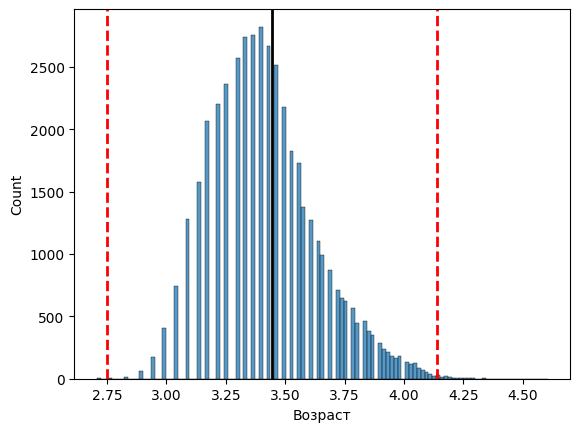

In [ ]:
# ваш код здесь

log_age = np.log(df['Возраст'])
histplot = sns.histplot(log_age, kde=False)

# Среднее и стандартное отклонение
mean = log_age.mean()
std = log_age.std()

# Добавляем линии
histplot.axvline(mean, color='k', lw=2)  # Среднее
histplot.axvline(mean - 3*std, color='r', lw=2, ls='--')  # -3 сигмы
histplot.axvline(mean + 3*std, color='r', lw=2, ls='--')  # +4 сигмы

In [ ]:
z_scores = (log_age - mean) / std
mask = ((z_scores > 4) | (z_scores < -3))
df = df[~mask]